# Studienprojekt Drohne

## 1 Business Understanding

### 1.1 Determine Business Objectives 

#### Background

In [1]:
#Studienprojekt

#### Business Objectives

In [2]:
#Herausfinden/Vorhersagen ob der Rotor Hinten Links beschädigt ist

#### Business Success Criteria

In [3]:
#bessere Informationen über eine Drohne und ihren Flug

### 1.2 Assess Situation

#### Inventory of Resources

##### Personen

In [4]:
#Christopher Nagl


##### Daten

In [5]:
#Studienarbeit mit 4 Datensätzen

#### Requirements, Assumptions, and Constraints

In [6]:
#Requirements: Bis Februar fertig 
#Assumptions: Wichtige Merkmale sind die Neigung der Drohne und die Daten des Motors (laut der Studienarbeit von Matthias Biller) 
#Constraints: Man kann die Ergebnisse nicht an neuen Daten testen (haben keine eigene Drohne)

#### Risks and Contingencies

In [7]:
#Risks: Man kann sich leicht in dem großen Datensatz verlieren
#Contingencies: Auf das Nötigste minimieren

### 1.3 Determine Data Mining Goals

#### Data Mining Goals

In [8]:
#Vorhersagen ob der hintere Rotor beschädigt ist, anhand der aufgezeichneten Daten der Drohne
#Wir wollen zudem, dass das Model schon relativ früh einen Schaden vorhersagt.
#Mehr dazu dann bei Model Evaluation

#### Data mining success criteria

In [9]:
#Vorhersage über 80% richtig

## 2 Data Understanding

### 2.1 Collect Initial Data

#### Initial data collection report

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
pd.options.display.max_columns=30
# Pfad in dem die Daten gespeichert werden
path='Datensatz_Drohne_Experiment_1.csv'
# Datensatz laden
df=pd.read_csv(path,low_memory=False)
# Datensatzkopf ausgeben
df.head(5)

,Tick#,offsetTime,Schaden:VL,Schaden:VR,Schaden:HL,Schaden:HR,IMU_ATTI(0):Longitude,IMU_ATTI(0):Latitude,IMU_ATTI(0):numSats,IMU_ATTI(0):barometer:Raw,IMU_ATTI(0):barometer:Smooth,IMU_ATTI(0):accel:X,IMU_ATTI(0):accel:Y,IMU_ATTI(0):accel:Z,IMU_ATTI(0):accel:Composite,...,Motor:thrustAngle,AirComp:AirSpeedBody:X,AirComp:AirSpeedBody:Y,AirComp:Alti,AirComp:WindSpeed,AirComp:Wind:X,AirComp:Wind:Y,AirComp:MotorSpeed,AirComp:VelLevel,flyCState,MotorCtrl:PWM:RFront,MotorCtrl:PWM:LFront,MotorCtrl:PWM:LBack,MotorCtrl:PWM:RBack,Attribute|Value
0,83308547,-45.061,NaN,NaN,NaN,NaN,12.196369,48.556122,11,277.04600,276.82560,-0.819315,-0.159615,-0.529703,0.988605,...,-45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,Firmware Date| Sep 20 2017
1,83392544,-45.042,NaN,NaN,NaN,NaN,12.196369,48.556122,11,276.94724,276.82584,-0.813760,-0.161909,-0.529964,0.984521,...,-45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,ACType|SPARK
2,83469102,-45.025,NaN,NaN,NaN,NaN,12.196369,48.556122,11,276.96338,276.82820,-0.809103,-0.165645,-0.534515,0.983764,...,-45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,dateTime|2019-10-30 15:0:41 GMT
3,83552844,-45.007,NaN,NaN,NaN,NaN,12.196369,48.556122,11,276.90997,276.82640,-0.808973,-0.172344,-0.538173,0.986797,...,-45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,NaN
4,83642952,-44.986,NaN,NaN,NaN,NaN,12.196369,48.556122,11,277.00568,276.82968,-0.816588,-0.173097,-0.537622,0.992882,...,-45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,NaN


In [11]:
#In den nächsten Zeilen versuchen wir die Flugbahn des ersten Datensatzes darzustellen. 
#Wir haben die entsprechenden Zeilen dem Datensatz entnommen.

##### Kompletter Flug ohne Schäden

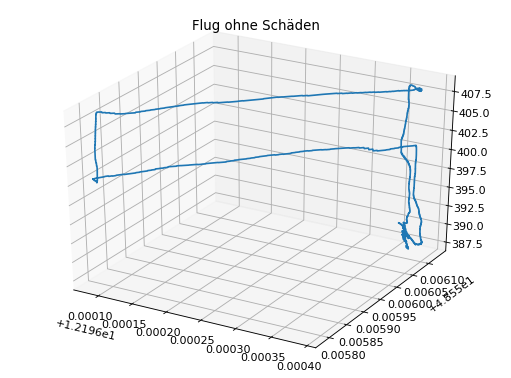

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w')

ax = fig.add_subplot(111, projection='3d')
plt.title('Flug ohne Schäden')
ax.plot(df['IMU_ATTI(0):Longitude'][0:10385],df['IMU_ATTI(0):Latitude'][0:10385],df['GPS(0):heightMSL'][0:10385])

##### Kompletter Flug mit Schaden HL

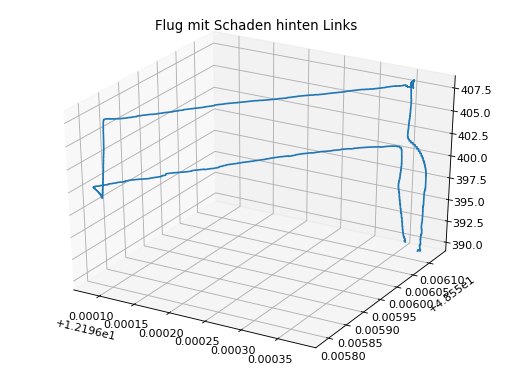

In [13]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w')
ax = fig.add_subplot(111, projection='3d')
plt.title('Flug mit Schaden hinten Links')
ax.plot(df['IMU_ATTI(0):Longitude'][10386:15385],df['IMU_ATTI(0):Latitude'][10386:15385],df['GPS(0):heightMSL'][10386:15385])
#HL Schaden kompletter Flug

##### Reine Flugphase ohne Schäden

In [14]:
#Reine Flugphase = Flug ohne Start und Landung
#Hier wird die reine Flugphase betrachtet, da Start und Landung nicht berücksichtigt werden, 
#weil hier der Schaden nicht deutlich erkennbar ist.

In [15]:
#Herausfiltern der relevanten Spalten für die reine Flugphase 
#Reduzieren des Datensatzes 
pd.options.display.max_rows = 999
df_keinSchaden = df[0:10385]
df_keinSchaden = df_keinSchaden[['IMU_ATTI(0):Longitude','IMU_ATTI(0):Latitude','GPS(0):heightMSL']]
df_keinSchaden['Delta_long'] = df_keinSchaden['IMU_ATTI(0):Longitude'].diff().apply(abs)
df_keinSchaden['Delta_lat'] = df_keinSchaden['IMU_ATTI(0):Latitude'].diff().apply(abs)
df_keinSchaden ['Flugphase'] = ((df_keinSchaden['Delta_long'] > 4.290700e-08) & (df_keinSchaden['Delta_lat'] >3.157504e-07))
df_keinSchaden['Flugphase'] = df_keinSchaden['Flugphase'].astype(int)
df_keinSchaden = df_keinSchaden[ (df_keinSchaden['Flugphase'] == 1) ]
df_keinSchaden

,IMU_ATTI(0):Longitude,IMU_ATTI(0):Latitude,GPS(0):heightMSL,Delta_long,Delta_lat,Flugphase
2762,12.196372,48.556116,400.832,4.311554e-07,4.239756e-07,1
2763,12.196371,48.556116,400.832,3.259604e-07,3.199741e-07,1
2766,12.196370,48.556115,400.832,3.401397e-07,3.357012e-07,1
2768,12.196370,48.556114,400.832,3.489023e-07,3.459491e-07,1
2769,12.196369,48.556114,400.832,3.533681e-07,3.515468e-07,1
...,...,...,...,...,...,...
4997,12.196361,48.556099,408.175,2.442029e-07,3.376692e-07,1
4998,12.196361,48.556100,408.175,2.438203e-07,3.347820e-07,1
5000,12.196361,48.556100,408.175,2.429175e-07,3.296947e-07,1
5001,12.196362,48.556101,408.175,2.424622e-07,3.267766e-07,1


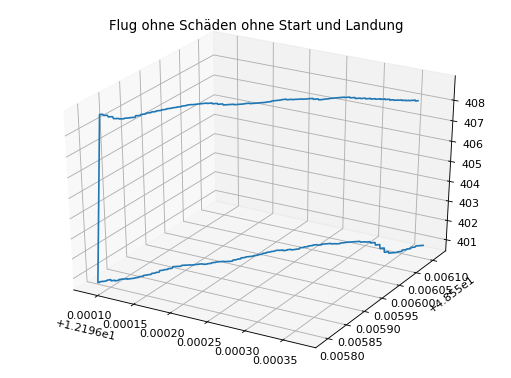

In [16]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w')
ax = fig.add_subplot(111, projection='3d')
plt.title('Flug ohne Schäden ohne Start und Landung')
ax.plot(df_keinSchaden['IMU_ATTI(0):Longitude'],df_keinSchaden['IMU_ATTI(0):Latitude'],df_keinSchaden['GPS(0):heightMSL'])

##### Reine Flugphase mit Schaden HL

In [17]:
df_schadenHL = df[10386:15385]
df_schadenHL = df_schadenHL[['IMU_ATTI(0):Longitude','IMU_ATTI(0):Latitude','GPS(0):heightMSL']]
df_schadenHL['Delta_long'] = df_schadenHL['IMU_ATTI(0):Longitude'].diff().apply(abs)
df_schadenHL['Delta_lat'] = df_schadenHL['IMU_ATTI(0):Latitude'].diff().apply(abs)
df_schadenHL['Flugphase'] = ((df_schadenHL['Delta_long'] > 4.290700e-08) & (df_schadenHL['Delta_lat'] >3.157504e-07))
df_schadenHL['Flugphase'] = df_schadenHL['Flugphase'].astype(int)
df_schadenHL = df_schadenHL[ (df_schadenHL['Flugphase'] == 1) ]
df_schadenHL[['IMU_ATTI(0):Longitude','IMU_ATTI(0):Latitude','GPS(0):heightMSL','Delta_long','Delta_lat','Flugphase']]


,IMU_ATTI(0):Longitude,IMU_ATTI(0):Latitude,GPS(0):heightMSL,Delta_long,Delta_lat,Flugphase
10949,12.196343,48.556113,401.147,4.570946e-07,3.988474e-07,1
10950,12.196343,48.556113,401.147,3.516469e-07,3.169026e-07,1
10951,12.196343,48.556113,401.147,3.592669e-07,3.246230e-07,1
10952,12.196342,48.556112,401.147,3.666263e-07,3.319404e-07,1
10954,12.196342,48.556112,401.147,3.788813e-07,3.437702e-07,1
...,...,...,...,...,...,...
13140,12.196336,48.556093,407.991,2.500303e-07,3.298153e-07,1
13141,12.196336,48.556093,407.991,2.480016e-07,3.266235e-07,1
13143,12.196336,48.556094,407.991,2.450862e-07,3.211813e-07,1
13144,12.196337,48.556094,407.991,2.436108e-07,3.181263e-07,1


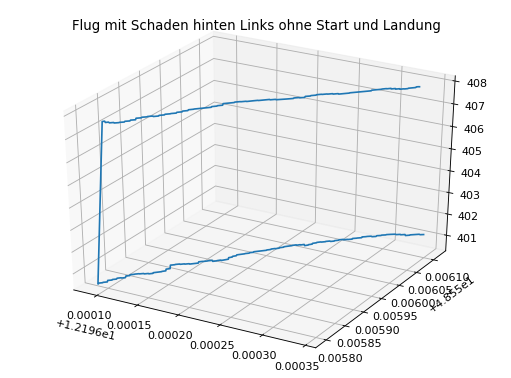

In [18]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w')
ax = fig.add_subplot(111, projection='3d')
plt.title('Flug mit Schaden hinten Links ohne Start und Landung')
ax.plot(df_schadenHL['IMU_ATTI(0):Longitude'],df_schadenHL['IMU_ATTI(0):Latitude'],df_schadenHL['GPS(0):heightMSL'])

In [19]:
#Ab hier fügen wir die restlichen Datensätze hinzu

In [20]:
#Merge Data

path2='Datensatz_Drohne_Experiment_2.csv'
df2=pd.read_csv(path2,low_memory=False)
path3='Datensatz_Drohne_Experiment_3.csv'
df3=pd.read_csv(path3,low_memory=False)
path4='Datensatz_Drohne_Experiment_4.csv'
df4=pd.read_csv(path4,low_memory=False)
frames = [df,df3,df4,df2]
df=pd.concat(frames,sort=False)
df.head(10)

,Tick#,offsetTime,Schaden:VL,Schaden:VR,Schaden:HL,Schaden:HR,IMU_ATTI(0):Longitude,IMU_ATTI(0):Latitude,IMU_ATTI(0):numSats,IMU_ATTI(0):barometer:Raw,IMU_ATTI(0):barometer:Smooth,IMU_ATTI(0):accel:X,IMU_ATTI(0):accel:Y,IMU_ATTI(0):accel:Z,IMU_ATTI(0):accel:Composite,...,AirComp:AirSpeedBody:Y,AirComp:Alti,AirComp:WindSpeed,AirComp:Wind:X,AirComp:Wind:Y,AirComp:MotorSpeed,AirComp:VelLevel,flyCState,MotorCtrl:PWM:RFront,MotorCtrl:PWM:LFront,MotorCtrl:PWM:LBack,MotorCtrl:PWM:RBack,Attribute|Value,ConvertDatV3,3.6.3
0,83308547,-45.061,NaN,NaN,NaN,NaN,12.196369,48.556122,11,277.04600,276.82560,-0.819315,-0.159615,-0.529703,0.988605,...,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,Firmware Date| Sep 20 2017,NaN,NaN
1,83392544,-45.042,NaN,NaN,NaN,NaN,12.196369,48.556122,11,276.94724,276.82584,-0.813760,-0.161909,-0.529964,0.984521,...,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,ACType|SPARK,NaN,NaN
2,83469102,-45.025,NaN,NaN,NaN,NaN,12.196369,48.556122,11,276.96338,276.82820,-0.809103,-0.165645,-0.534515,0.983764,...,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,dateTime|2019-10-30 15:0:41 GMT,NaN,NaN
3,83552844,-45.007,NaN,NaN,NaN,NaN,12.196369,48.556122,11,276.90997,276.82640,-0.808973,-0.172344,-0.538173,0.986797,...,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83642952,-44.986,NaN,NaN,NaN,NaN,12.196369,48.556122,11,277.00568,276.82968,-0.816588,-0.173097,-0.537622,0.992882,...,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,83732819,-44.967,NaN,NaN,NaN,NaN,12.196369,48.556122,11,276.92105,276.82947,-0.822949,-0.164215,-0.536552,0.996042,...,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,83822975,-44.946,NaN,NaN,NaN,NaN,12.196369,48.556122,10,277.22427,276.83520,-0.813786,-0.161979,-0.530804,0.985006,...,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,83912811,-44.927,NaN,NaN,NaN,NaN,12.196369,48.556122,10,277.02884,276.84204,-0.804303,-0.165940,-0.529137,0.976947,...,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,84003134,-44.906,NaN,NaN,NaN,NaN,12.196369,48.556122,10,276.87775,276.84244,-0.801837,-0.170127,-0.531547,0.976948,...,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,84092862,-44.887,NaN,NaN,NaN,NaN,12.196369,48.556122,10,276.91500,276.84010,-0.799750,-0.168743,-0.533508,0.976066,...,0.0,0.0,0.0,0.0,0.0,0.0,0,GPS_Atti,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#NaN durch 0 ersetzen
df = df.fillna(0)
df

,Tick#,offsetTime,Schaden:VL,Schaden:VR,Schaden:HL,Schaden:HR,IMU_ATTI(0):Longitude,IMU_ATTI(0):Latitude,IMU_ATTI(0):numSats,IMU_ATTI(0):barometer:Raw,IMU_ATTI(0):barometer:Smooth,IMU_ATTI(0):accel:X,IMU_ATTI(0):accel:Y,IMU_ATTI(0):accel:Z,IMU_ATTI(0):accel:Composite,...,AirComp:AirSpeedBody:Y,AirComp:Alti,AirComp:WindSpeed,AirComp:Wind:X,AirComp:Wind:Y,AirComp:MotorSpeed,AirComp:VelLevel,flyCState,MotorCtrl:PWM:RFront,MotorCtrl:PWM:LFront,MotorCtrl:PWM:LBack,MotorCtrl:PWM:RBack,Attribute|Value,ConvertDatV3,3.6.3
0,83308547,-45.061,0.0,0.0,0.0,0.0,12.196369,48.556122,11,277.04600,276.82560,-0.819315,-0.159615,-0.529703,0.988605,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,GPS_Atti,0.00,0.00,0.00,0.00,Firmware Date| Sep 20 2017,0.0,0.0
1,83392544,-45.042,0.0,0.0,0.0,0.0,12.196369,48.556122,11,276.94724,276.82584,-0.813760,-0.161909,-0.529964,0.984521,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,GPS_Atti,0.00,0.00,0.00,0.00,ACType|SPARK,0.0,0.0
2,83469102,-45.025,0.0,0.0,0.0,0.0,12.196369,48.556122,11,276.96338,276.82820,-0.809103,-0.165645,-0.534515,0.983764,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,GPS_Atti,0.00,0.00,0.00,0.00,dateTime|2019-10-30 15:0:41 GMT,0.0,0.0
3,83552844,-45.007,0.0,0.0,0.0,0.0,12.196369,48.556122,11,276.90997,276.82640,-0.808973,-0.172344,-0.538173,0.986797,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,GPS_Atti,0.00,0.00,0.00,0.00,0,0.0,0.0
4,83642952,-44.986,0.0,0.0,0.0,0.0,12.196369,48.556122,11,277.00568,276.82968,-0.816588,-0.173097,-0.537622,0.992882,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,GPS_Atti,0.00,0.00,0.00,0.00,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29569,2692433659,492.976,1.0,0.0,0.0,0.0,12.195242,48.554280,17,245.27061,253.05865,0.022311,-0.001988,-0.980022,0.980278,...,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,FORCE_LANDING,21.19,10.00,40.48,41.38,0,0.0,0.0
29570,2692523460,492.996,1.0,0.0,0.0,0.0,12.195242,48.554280,17,245.49745,253.05843,0.024849,-0.019144,-0.983191,0.983691,...,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,FORCE_LANDING,15.78,10.00,44.24,39.43,0,0.0,0.0
29571,2692610696,493.015,1.0,0.0,0.0,0.0,12.195242,48.554280,17,245.52760,253.05832,0.026022,-0.012653,-0.980031,0.980458,...,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,FORCE_LANDING,22.96,10.00,42.14,41.80,0,0.0,0.0
29572,2692686195,493.032,1.0,0.0,0.0,0.0,12.195242,48.554280,17,245.57889,253.05830,0.026896,-0.010385,-0.979843,0.980267,...,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,FORCE_LANDING,15.56,18.41,11.85,10.00,0,0.0,0.0


In [22]:
#Da im Folgenden nur die Flugphase betrachtet wird, wird diese hier nochmals herausgefiltert.
#df['Delta_long'] = df['IMU_ATTI(0):Longitude'].diff().apply(abs)
#df['Delta_lat'] = df['IMU_ATTI(0):Latitude'].diff().apply(abs)
#df['Flugphase'] = ((df['Delta_long'] > 4.290700e-08) & (df['Delta_lat'] > 3.157504e-07))
#df['Flugphase'] = df['Flugphase'].astype(int)
#df = df[ (df['Flugphase'] == 1) ]
#df

### 2.2 Describe Data

#### Data description report

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103810 entries, 0 to 29573
Columns: 112 entries, Tick# to 3.6.3
dtypes: float64(72), int64(37), object(3)
memory usage: 89.5+ MB


In [24]:
#Mit dem Datentyp "object" können wir nicht arbeiten und muss deswegen bearbeitet oder entfernt werden
df=df.select_dtypes(include='number')
#dann füllen wir ihn mit 0 
df=df.fillna(0)

In [25]:
#mit describe() können beispielsweise der Mittelwert, die Standardabweichung, Minimal- und Maximalwerte ausgegeben werden
#Man erhält eine statistische Übersicht über die Daten.
df.describe()

,Tick#,offsetTime,Schaden:VL,Schaden:VR,Schaden:HL,Schaden:HR,IMU_ATTI(0):Longitude,IMU_ATTI(0):Latitude,IMU_ATTI(0):numSats,IMU_ATTI(0):barometer:Raw,IMU_ATTI(0):barometer:Smooth,IMU_ATTI(0):accel:X,IMU_ATTI(0):accel:Y,IMU_ATTI(0):accel:Z,IMU_ATTI(0):accel:Composite,...,Motor:thrustAngle,AirComp:AirSpeedBody:X,AirComp:AirSpeedBody:Y,AirComp:Alti,AirComp:WindSpeed,AirComp:Wind:X,AirComp:Wind:Y,AirComp:MotorSpeed,AirComp:VelLevel,MotorCtrl:PWM:RFront,MotorCtrl:PWM:LFront,MotorCtrl:PWM:LBack,MotorCtrl:PWM:RBack,ConvertDatV3,3.6.3
count,1.038100e+05,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,...,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.000000,103810.0,103810.0
mean,1.408444e+09,236.287251,0.168943,0.123948,0.315239,0.169916,10.834898,43.137371,13.443541,270.942725,270.639875,0.012855,0.024117,-0.975473,0.987164,...,-33.582073,-0.080884,-0.878277,0.272522,0.826772,-0.496948,0.109996,204.018064,98.567566,36.030497,35.289974,39.797214,40.732482,0.0,0.0
std,8.625558e+08,192.676368,0.374704,0.329523,0.464613,0.375561,3.839798,15.287528,5.134059,23.544523,22.713749,0.111684,0.084809,0.084235,0.067549,...,59.573893,1.519490,1.618764,0.368872,1.078063,0.885037,0.896342,81.499067,33.107792,25.356209,24.651689,24.632281,25.707358,0.0,0.0
min,5.811847e+07,-66.452000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.331120,247.197190,-1.423895,-0.605086,-2.103999,0.344275,...,-179.952746,-4.766068,-8.481125,-1.057305,0.000000,-3.891018,-2.461412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,6.960274e+08,79.374000,0.000000,0.000000,0.000000,0.000000,12.195130,48.554289,13.000000,248.393470,251.208663,-0.011408,-0.014844,-0.985990,0.978093,...,-45.000000,-0.705650,-2.059291,0.000000,0.000000,-0.652503,0.000000,223.112720,97.000000,10.000000,10.380000,17.610000,14.500000,0.0,0.0
50%,1.246167e+09,200.065000,0.000000,0.000000,0.000000,0.000000,12.195274,48.554375,15.000000,270.765215,270.647885,0.027834,0.009364,-0.979637,0.982873,...,-45.000000,-0.456894,-0.843839,0.121340,0.075636,0.000000,0.000000,233.567780,107.000000,46.210000,44.240000,47.550000,55.070000,0.0,0.0
75%,2.004460e+09,361.017750,0.000000,0.000000,1.000000,0.000000,12.196355,48.556111,17.000000,288.810715,285.610412,0.063862,0.064824,-0.972638,0.990817,...,-11.427102,0.045686,0.000000,0.444941,1.606028,0.000000,0.197207,240.595580,113.000000,60.180000,58.330000,63.000000,64.190000,0.0,0.0
max,3.502836e+09,714.834000,1.000000,1.000000,1.000000,1.000000,12.196423,48.556143,18.000000,319.872650,321.251250,0.959322,1.190727,0.066296,2.244022,...,180.000000,6.712510,8.139091,1.976858,4.148913,0.524736,2.879605,279.796230,139.000000,100.000000,100.000000,99.990000,99.510000,0.0,0.0


In [26]:
#Korrelation aller Features -> wechselseitige Beziehung zwischen einzelnen Merkmalen
corr= df.corr()
corr

,Tick#,offsetTime,Schaden:VL,Schaden:VR,Schaden:HL,Schaden:HR,IMU_ATTI(0):Longitude,IMU_ATTI(0):Latitude,IMU_ATTI(0):numSats,IMU_ATTI(0):barometer:Raw,IMU_ATTI(0):barometer:Smooth,IMU_ATTI(0):accel:X,IMU_ATTI(0):accel:Y,IMU_ATTI(0):accel:Z,IMU_ATTI(0):accel:Composite,...,Motor:thrustAngle,AirComp:AirSpeedBody:X,AirComp:AirSpeedBody:Y,AirComp:Alti,AirComp:WindSpeed,AirComp:Wind:X,AirComp:Wind:Y,AirComp:MotorSpeed,AirComp:VelLevel,MotorCtrl:PWM:RFront,MotorCtrl:PWM:LFront,MotorCtrl:PWM:LBack,MotorCtrl:PWM:RBack,ConvertDatV3,3.6.3
Tick#,1.000000,0.995543,0.302600,0.157397,0.401511,0.332225,0.267601,0.267575,0.340805,0.024681,-0.024106,0.032915,0.059555,-0.061988,-0.002770,...,-0.023309,-0.006640,-0.021296,0.084133,0.183664,-0.055543,0.264440,0.444904,0.554190,0.225147,0.245719,0.289662,0.279065,NaN,NaN
offsetTime,0.995543,1.000000,0.310411,0.161746,0.428126,0.344298,0.244983,0.244952,0.326624,0.083403,0.030061,0.030640,0.034360,-0.067796,-0.005450,...,0.011306,0.016555,0.013012,0.090538,0.186277,-0.040341,0.288640,0.446787,0.552989,0.230720,0.256530,0.308598,0.292798,NaN,NaN
Schaden:VL,0.302600,0.310411,1.000000,0.216436,0.109080,-0.203991,-0.160712,-0.160706,-0.043158,0.135792,0.149198,-0.073148,0.045241,-0.064814,0.039068,...,0.202387,0.115218,-0.034643,0.248401,0.242729,-0.138808,-0.132402,0.119312,0.241099,0.354498,0.378962,0.358384,0.334619,NaN,NaN
Schaden:VR,0.157397,0.161746,0.216436,1.000000,0.076625,0.240343,0.133292,0.133301,0.220079,-0.060631,-0.080275,-0.103783,0.059664,-0.058132,0.049374,...,0.015647,0.194793,-0.074989,0.219015,0.325985,-0.225421,-0.190608,0.090693,0.142666,0.272421,0.268870,0.302119,0.323929,NaN,NaN
Schaden:HL,0.401511,0.428126,0.109080,0.076625,1.000000,0.525872,0.009689,0.009662,0.131411,0.350873,0.306731,-0.111917,-0.042526,-0.035396,-0.034060,...,0.210430,0.184363,0.113199,0.287821,0.306773,-0.079224,0.535287,0.189128,0.335950,0.490419,0.531374,0.566881,0.550328,NaN,NaN
Schaden:HR,0.332225,0.344298,-0.203991,0.240343,0.525872,1.000000,0.160355,0.160347,0.274058,0.066103,0.038368,-0.078854,0.003487,-0.023304,-0.019028,...,-0.023263,0.130610,0.009774,0.155331,0.234941,-0.140721,0.229677,0.124366,0.206814,0.334662,0.333227,0.367926,0.391119,NaN,NaN
IMU_ATTI(0):Longitude,0.267601,0.244983,-0.160712,0.133292,0.009689,0.160355,1.000000,1.000000,0.927972,-0.685219,-0.751931,-0.027036,0.084559,0.028813,0.021357,...,-0.334787,0.091193,-0.172127,0.054099,0.236088,-0.230286,0.016312,0.008496,-0.041561,0.011120,-0.022541,0.012361,0.044183,NaN,NaN
IMU_ATTI(0):Latitude,0.267575,0.244952,-0.160706,0.133301,0.009662,0.160347,1.000000,1.000000,0.927976,-0.685274,-0.751980,-0.027037,0.084583,0.028813,0.021364,...,-0.334812,0.091188,-0.172164,0.054104,0.236106,-0.230325,0.016253,0.008490,-0.041570,0.011127,-0.022540,0.012355,0.044182,NaN,NaN
IMU_ATTI(0):numSats,0.340805,0.326624,-0.043158,0.220079,0.131411,0.274058,0.927972,0.927976,1.000000,-0.586180,-0.645831,-0.020793,0.157303,-0.021399,0.022228,...,-0.326100,0.137350,-0.232517,0.199690,0.423094,-0.379495,0.020006,0.118568,0.097355,0.221892,0.186426,0.215888,0.262525,NaN,NaN
IMU_ATTI(0):barometer:Raw,0.024681,0.083403,0.135792,-0.060631,0.350873,0.066103,-0.685219,-0.685274,-0.586180,1.000000,0.991726,-0.075720,-0.234897,-0.027277,-0.074956,...,0.460371,0.138882,0.419076,0.041552,-0.079550,0.299440,0.466375,0.125348,0.183141,0.189663,0.259131,0.303821,0.252901,NaN,NaN


In [27]:
#Da wir oben gesagt haben, dass vielleicht die Neigung(nach vorne oder hinten) der Drohne
#beim Flug wichtig sein kann, schauen wir uns das mal an
Angle_corr = corr['Motor:thrustAngle']
Angle_corr = Angle_corr.sort_values(ascending=False)
Angle_corr.head(10)

Motor:thrustAngle               1.000000
AirComp:AirSpeedBody:Y          0.547379
Motor:EscTemp:LBack             0.468026
IMU_ATTI(0):barometer:Raw       0.460371
IMU_ATTI(0):barometer:Smooth    0.455467
Motor:EscTemp:RBack             0.406425
GPS(0):Time                     0.396800
Motor:EscTemp:LFront            0.392709
AirComp:AirSpeedBody:X          0.388432
Motor:Current:LBack             0.357024
Name: Motor:thrustAngle, dtype: float64

In [28]:
#Motor:thrustAngle in Abhängigkeit von AirComp:AirSpeedBody:Y sagt wahrscheinlich, Drohne schneller -> Neigt sich mehr 

### 2.3 Explore Data

##### DateFrame für alle unbeschädigten Rotatoren

In [29]:
df_alles_gut = df[(df['Schaden:HR'] == 0) 
                 & (df['Schaden:VR'] == 0) 
                 & (df['Schaden:VL'] == 0) 
                 & (df['Schaden:HL'] == 0)]
df_alles_gut

,Tick#,offsetTime,Schaden:VL,Schaden:VR,Schaden:HL,Schaden:HR,IMU_ATTI(0):Longitude,IMU_ATTI(0):Latitude,IMU_ATTI(0):numSats,IMU_ATTI(0):barometer:Raw,IMU_ATTI(0):barometer:Smooth,IMU_ATTI(0):accel:X,IMU_ATTI(0):accel:Y,IMU_ATTI(0):accel:Z,IMU_ATTI(0):accel:Composite,...,Motor:thrustAngle,AirComp:AirSpeedBody:X,AirComp:AirSpeedBody:Y,AirComp:Alti,AirComp:WindSpeed,AirComp:Wind:X,AirComp:Wind:Y,AirComp:MotorSpeed,AirComp:VelLevel,MotorCtrl:PWM:RFront,MotorCtrl:PWM:LFront,MotorCtrl:PWM:LBack,MotorCtrl:PWM:RBack,ConvertDatV3,3.6.3
0,83308547,-45.061,0.0,0.0,0.0,0.0,12.196369,48.556122,11,277.04600,276.82560,-0.819315,-0.159615,-0.529703,0.988605,...,-45.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0,0.00,0.00,0.00,0.00,0.0,0.0
1,83392544,-45.042,0.0,0.0,0.0,0.0,12.196369,48.556122,11,276.94724,276.82584,-0.813760,-0.161909,-0.529964,0.984521,...,-45.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0,0.00,0.00,0.00,0.00,0.0,0.0
2,83469102,-45.025,0.0,0.0,0.0,0.0,12.196369,48.556122,11,276.96338,276.82820,-0.809103,-0.165645,-0.534515,0.983764,...,-45.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0,0.00,0.00,0.00,0.00,0.0,0.0
3,83552844,-45.007,0.0,0.0,0.0,0.0,12.196369,48.556122,11,276.90997,276.82640,-0.808973,-0.172344,-0.538173,0.986797,...,-45.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0,0.00,0.00,0.00,0.00,0.0,0.0
4,83642952,-44.986,0.0,0.0,0.0,0.0,12.196369,48.556122,11,277.00568,276.82968,-0.816588,-0.173097,-0.537622,0.992882,...,-45.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26472,2437936035,436.421,0.0,0.0,0.0,0.0,12.195245,48.554280,18,246.94012,251.91943,0.095480,0.008612,-0.978619,0.983304,...,-49.864514,-0.681061,-1.175982,0.000501,0.0,0.0,0.0,238.38197,110,0.39,0.39,0.39,0.39,0.0,0.0
26473,2438026080,436.441,0.0,0.0,0.0,0.0,12.195245,48.554280,18,246.82692,251.92007,0.093828,0.004618,-0.979576,0.984070,...,-49.864514,-0.681061,-1.175982,0.000501,0.0,0.0,0.0,238.38197,110,0.53,0.53,0.53,0.53,0.0,0.0
26474,2438115885,436.461,0.0,0.0,0.0,0.0,12.195245,48.554280,18,246.88353,251.92080,0.095821,0.001684,-0.981039,0.985709,...,-115.906508,-0.681061,-1.175982,0.400501,0.0,0.0,0.0,238.38197,110,0.66,0.66,0.66,0.66,0.0,0.0
26475,2438205809,436.481,0.0,0.0,0.0,0.0,12.195245,48.554280,18,246.85219,251.92154,0.092429,0.005244,-0.979895,0.984259,...,-115.906508,-0.681061,-1.175982,0.400501,0.0,0.0,0.0,238.38197,110,0.79,0.79,0.79,0.79,0.0,0.0


##### DateFrame für Schaden HL

In [30]:
df_hl = df[(df['Schaden:HR'] == 0) 
           & (df['Schaden:VR'] == 0) 
           & (df['Schaden:VL'] == 0) 
           & (df['Schaden:HL'] == 1)]
df_hl

,Tick#,offsetTime,Schaden:VL,Schaden:VR,Schaden:HL,Schaden:HR,IMU_ATTI(0):Longitude,IMU_ATTI(0):Latitude,IMU_ATTI(0):numSats,IMU_ATTI(0):barometer:Raw,IMU_ATTI(0):barometer:Smooth,IMU_ATTI(0):accel:X,IMU_ATTI(0):accel:Y,IMU_ATTI(0):accel:Z,IMU_ATTI(0):accel:Composite,...,Motor:thrustAngle,AirComp:AirSpeedBody:X,AirComp:AirSpeedBody:Y,AirComp:Alti,AirComp:WindSpeed,AirComp:Wind:X,AirComp:Wind:Y,AirComp:MotorSpeed,AirComp:VelLevel,MotorCtrl:PWM:RFront,MotorCtrl:PWM:LFront,MotorCtrl:PWM:LBack,MotorCtrl:PWM:RBack,ConvertDatV3,3.6.3
10386,969060254,151.773,0.0,0.0,1.0,0.0,12.196358,48.556119,14,276.41843,274.91950,0.063754,-0.022216,-0.980393,0.982715,...,-72.407575,-0.511953,-0.003916,-0.000143,0.000000,0.000000,0.00000,223.11272,95,0.39,0.39,0.39,0.39,0.0,0.0
10387,969149912,151.793,0.0,0.0,1.0,0.0,12.196358,48.556119,14,276.24115,274.92047,0.063292,-0.017259,-0.979298,0.981493,...,-72.407575,-0.511953,-0.003916,-0.000143,0.000000,0.000000,0.00000,223.11272,95,0.53,0.53,0.53,0.53,0.0,0.0
10388,969239910,151.813,0.0,0.0,1.0,0.0,12.196358,48.556119,14,276.33182,274.92145,0.063657,-0.023748,-0.978142,0.980499,...,-108.434949,-0.511953,-0.003916,-0.000143,0.000000,0.000000,0.00000,223.11272,95,0.66,0.66,0.66,0.66,0.0,0.0
10389,969329865,151.833,0.0,0.0,1.0,0.0,12.196358,48.556119,14,276.01953,274.92242,0.064564,-0.018084,-0.979535,0.981827,...,-108.434949,-0.511953,-0.003916,-0.000143,0.000000,0.000000,0.00000,223.11272,95,0.79,0.79,0.79,0.79,0.0,0.0
10390,969419752,151.853,0.0,0.0,1.0,0.0,12.196358,48.556119,14,275.92180,274.92340,0.064430,-0.020943,-0.980074,0.982413,...,79.992020,-0.511953,-0.003916,0.399857,0.000000,0.000000,0.00000,223.11272,95,0.93,0.93,0.93,0.93,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13699,1351610498,195.015,0.0,0.0,1.0,0.0,12.195223,48.554270,15,246.47581,248.98645,-0.000023,0.008119,-0.977122,0.977156,...,-4.494264,-0.707249,-1.293909,0.499134,1.869951,-1.866737,0.10959,241.31007,113,10.00,10.44,15.37,14.44,0.0,0.0
13700,1351703271,195.036,0.0,0.0,1.0,0.0,12.195223,48.554270,15,246.04517,248.91576,-0.018955,0.014872,-0.992619,0.992911,...,-4.494264,-0.707249,-1.293909,0.499134,1.869951,-1.866737,0.10959,241.31007,113,10.00,10.44,15.37,14.44,0.0,0.0
13701,1351790230,195.055,0.0,0.0,1.0,0.0,12.195223,48.554270,15,246.14626,248.87279,0.098686,0.030393,-0.992838,0.998194,...,-5.199417,-0.705650,-1.252807,0.000585,0.000000,0.000000,0.00000,239.82983,111,10.00,10.44,15.37,14.44,0.0,0.0
13702,1351883178,195.076,0.0,0.0,1.0,0.0,12.195223,48.554270,15,246.34135,248.81488,0.122125,-0.041329,-0.962047,0.970648,...,-5.199417,-0.705650,-1.252807,0.000585,0.000000,0.000000,0.00000,239.82983,111,10.00,10.44,15.37,14.44,0.0,0.0


##### Vergleich der Drohenen Neigung durch boxplot

In [31]:
#Hier werden wir ein paar Spalten mit Boxplot darstellen, 
#in Abhängigkeit davon, wie viele und welche Rotatoren beschädigt sind.
#Ein Boxplot dient zur Visualisierung der Verteilung von Daten.

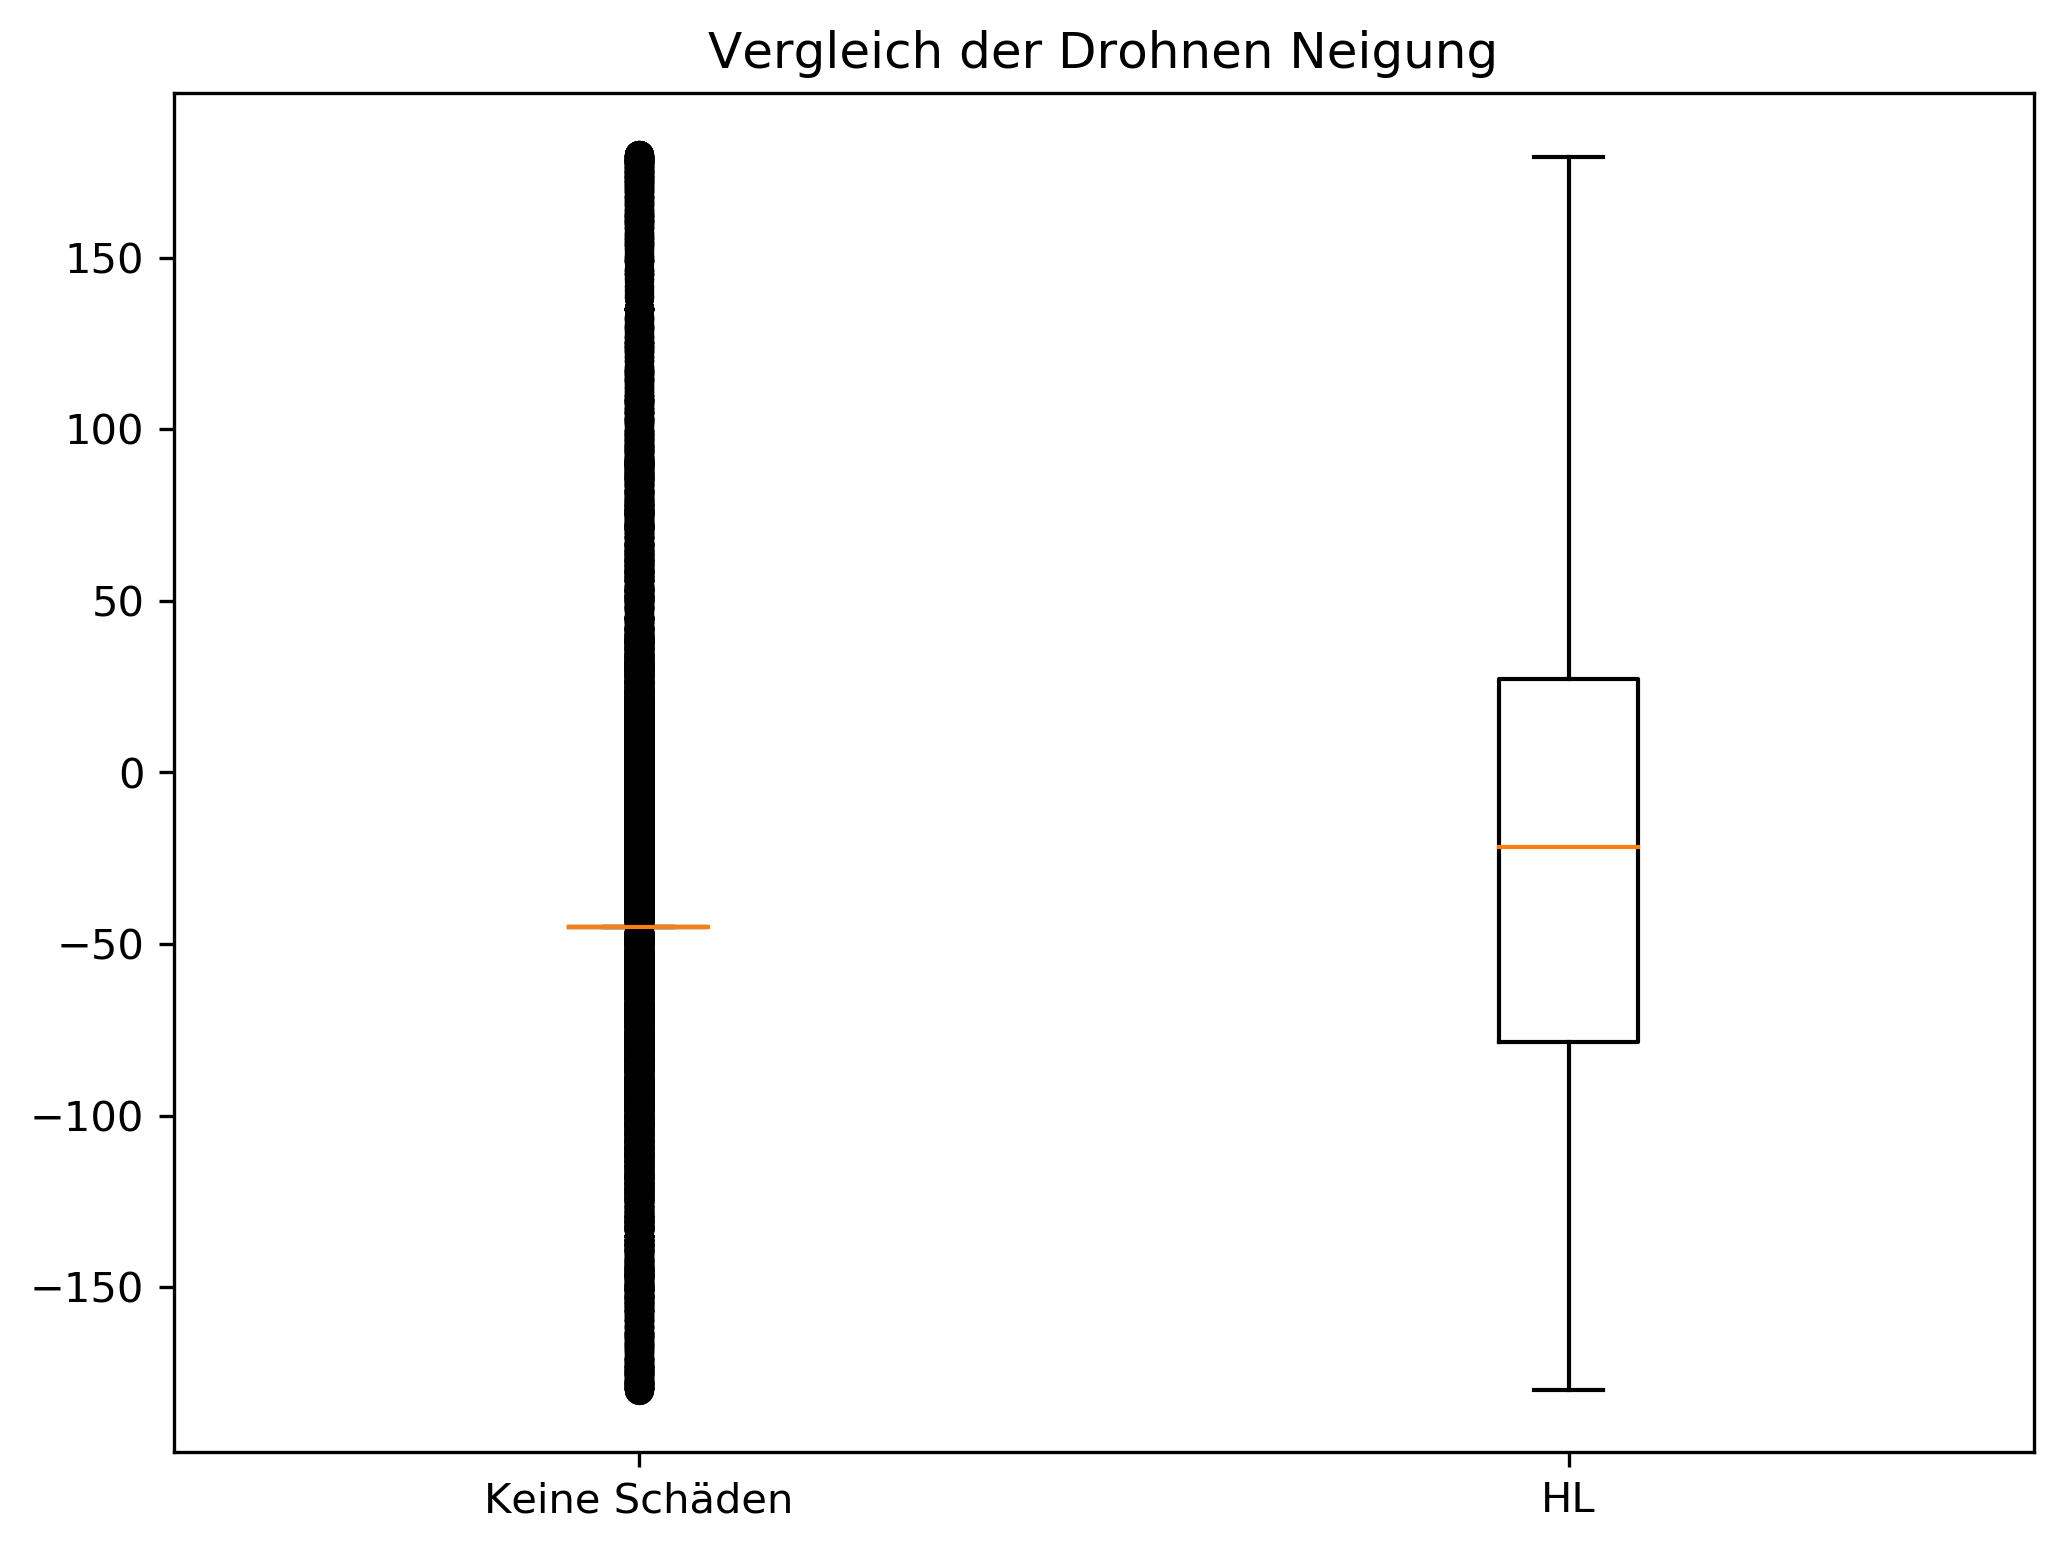

In [32]:
labels = ['Keine Schäden', 'HL']

plt.figure(figsize=(8,6), dpi=300)

plt.title('Vergleich der Drohnen Neigung')

feature = 'Motor:thrustAngle'
#plt.ylim((-23, 23))


plt.boxplot([df_alles_gut[feature],df_hl[feature]],
            labels=labels)
plt.show()

In [33]:
#Der orange Strich ist der Median, der die Box in alle Werte zwischen der unteren Hälfe(25%) und oberen Hälfte(75%) teilt.
#Die Punkte stellen Ausreißer dar.
#An der Position des Medians erkennt man die Veränderung der Neigung, wenn Hl ein Schaden vorhanden ist.


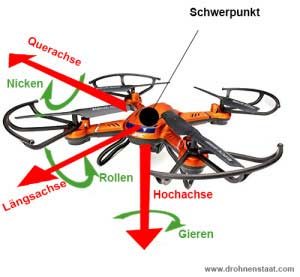

In [34]:
from IPython import display 
display.Image("./Drohne_Achsen.jpg")

##### Quer=X , Längs=Y, Hoch=Z

##### Vergleich der Flugbewegung

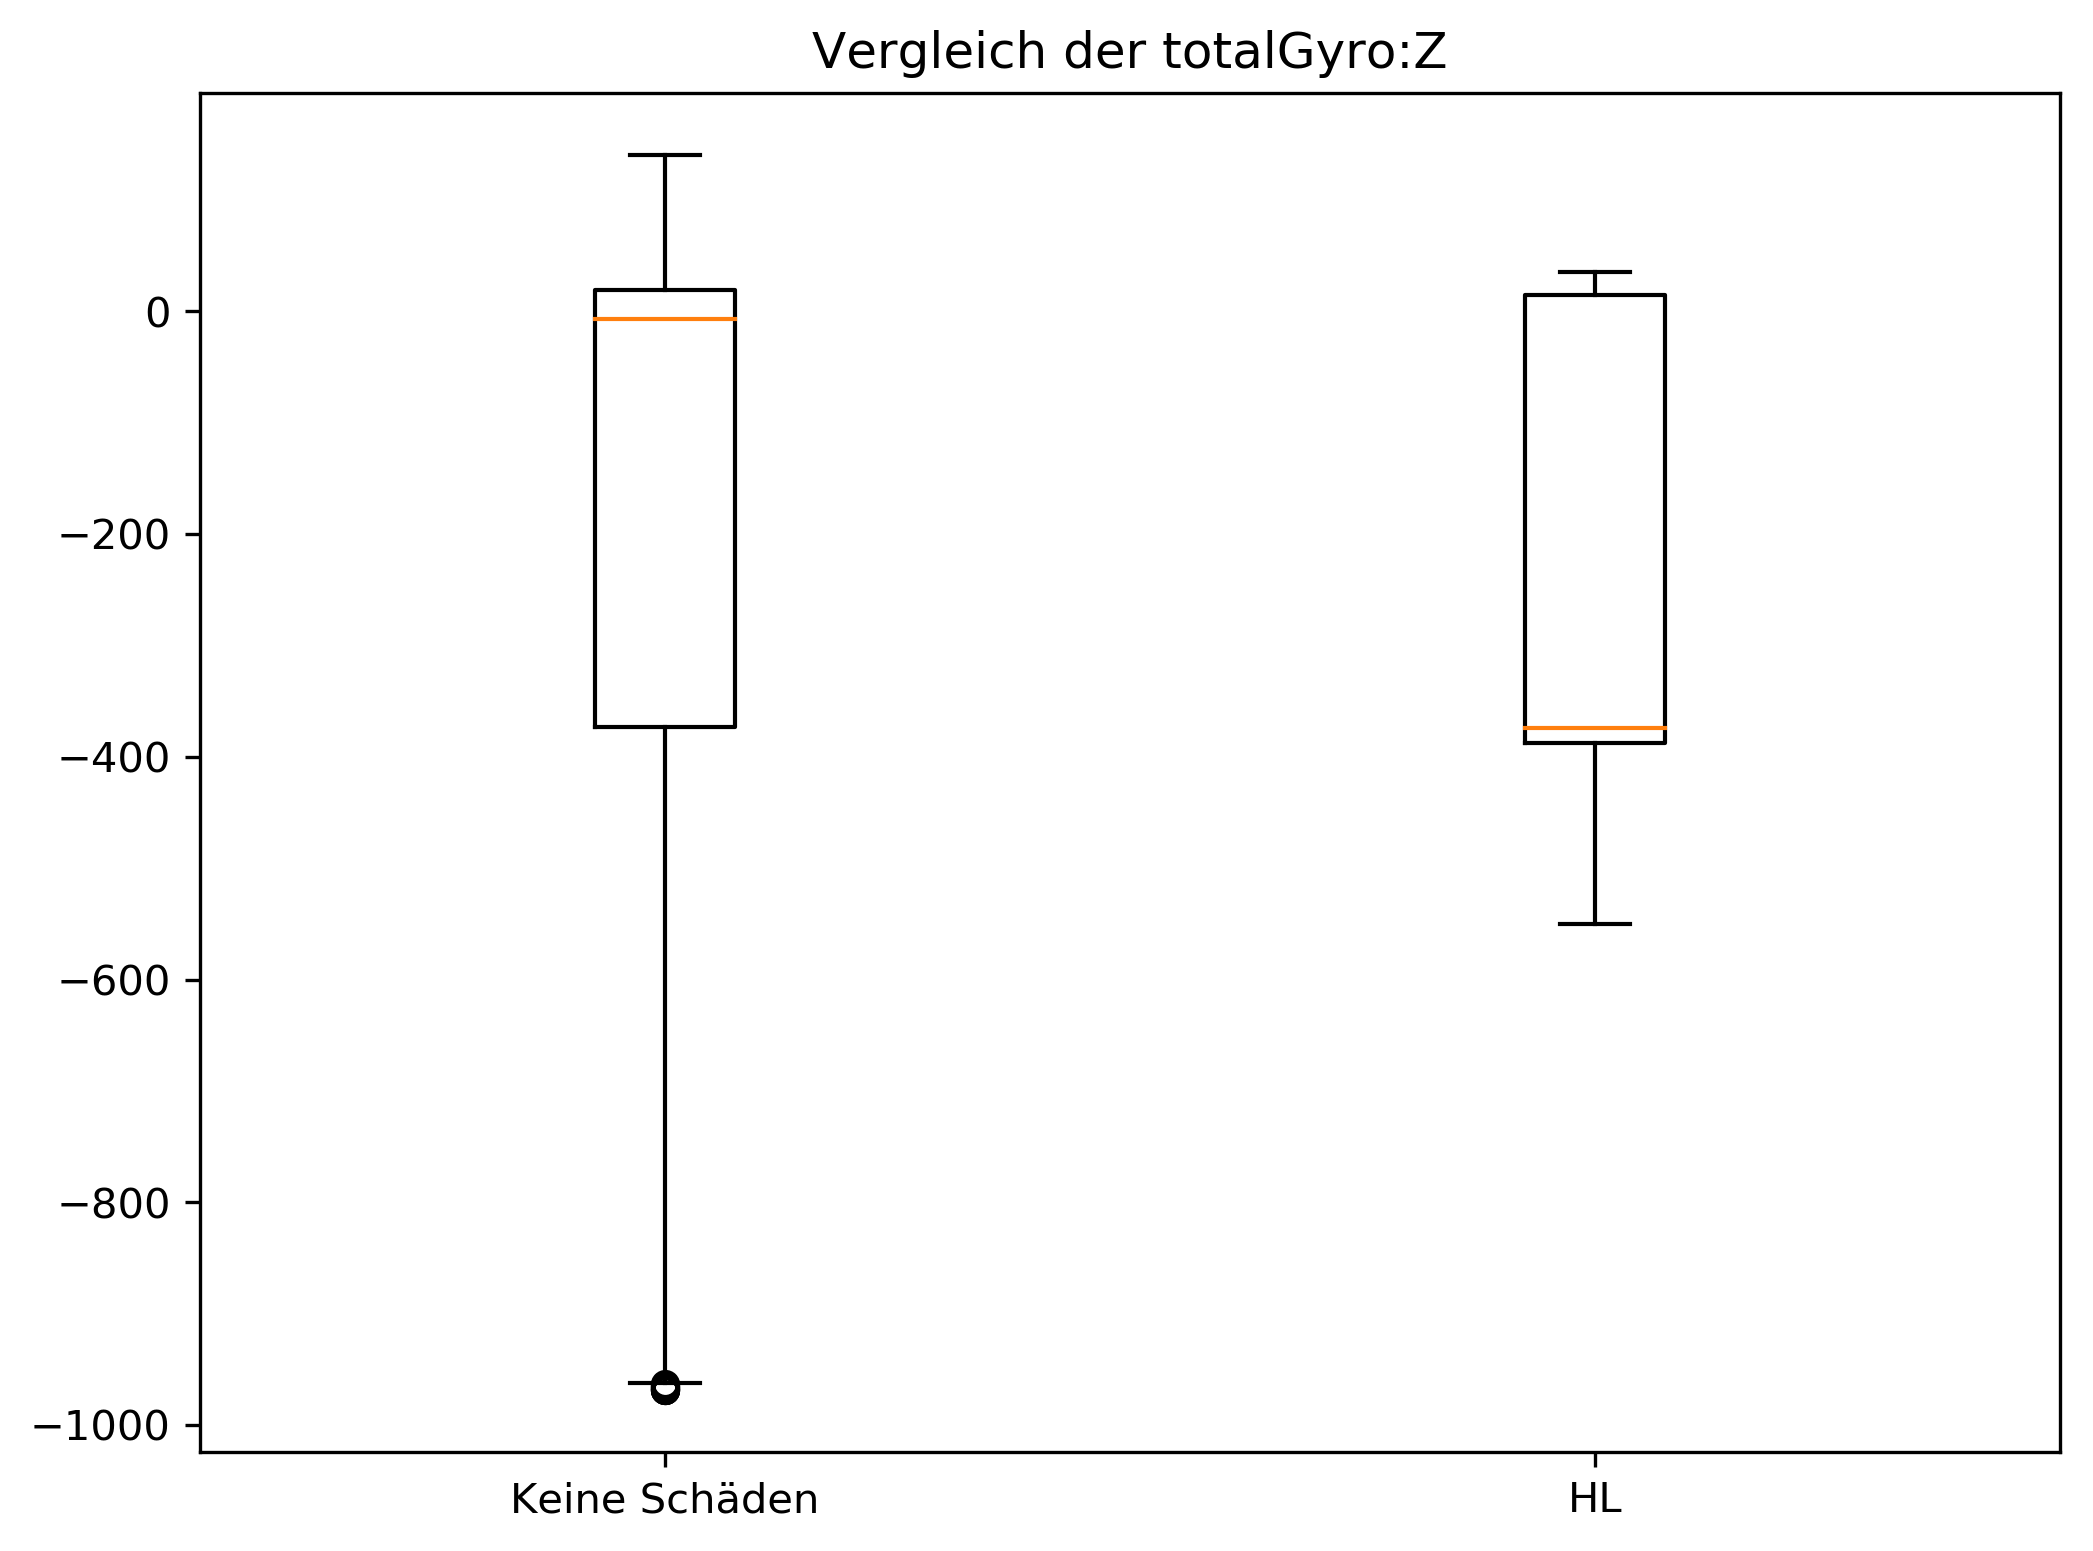

In [35]:
labels = ['Keine Schäden', 'HL']

plt.figure(figsize=(8,6), dpi=300)

plt.title('Vergleich der totalGyro:Z')

feature = 'IMU_ATTI(0):totalGyro:Z'

plt.boxplot([df_alles_gut[feature],df_hl[feature]], labels=labels)
plt.show()

In [36]:
#Mit totalGyro:Z ist die Achse gemeint, auf der sich die Drohne noch oben und unten bewegt.
#Wenn keine Rotoren beschädigt sind, fällt auf, dass der Mean Wert deutlich näher an 0 ist als bei einem Schaden hinten links

##### Vergleich des Motors

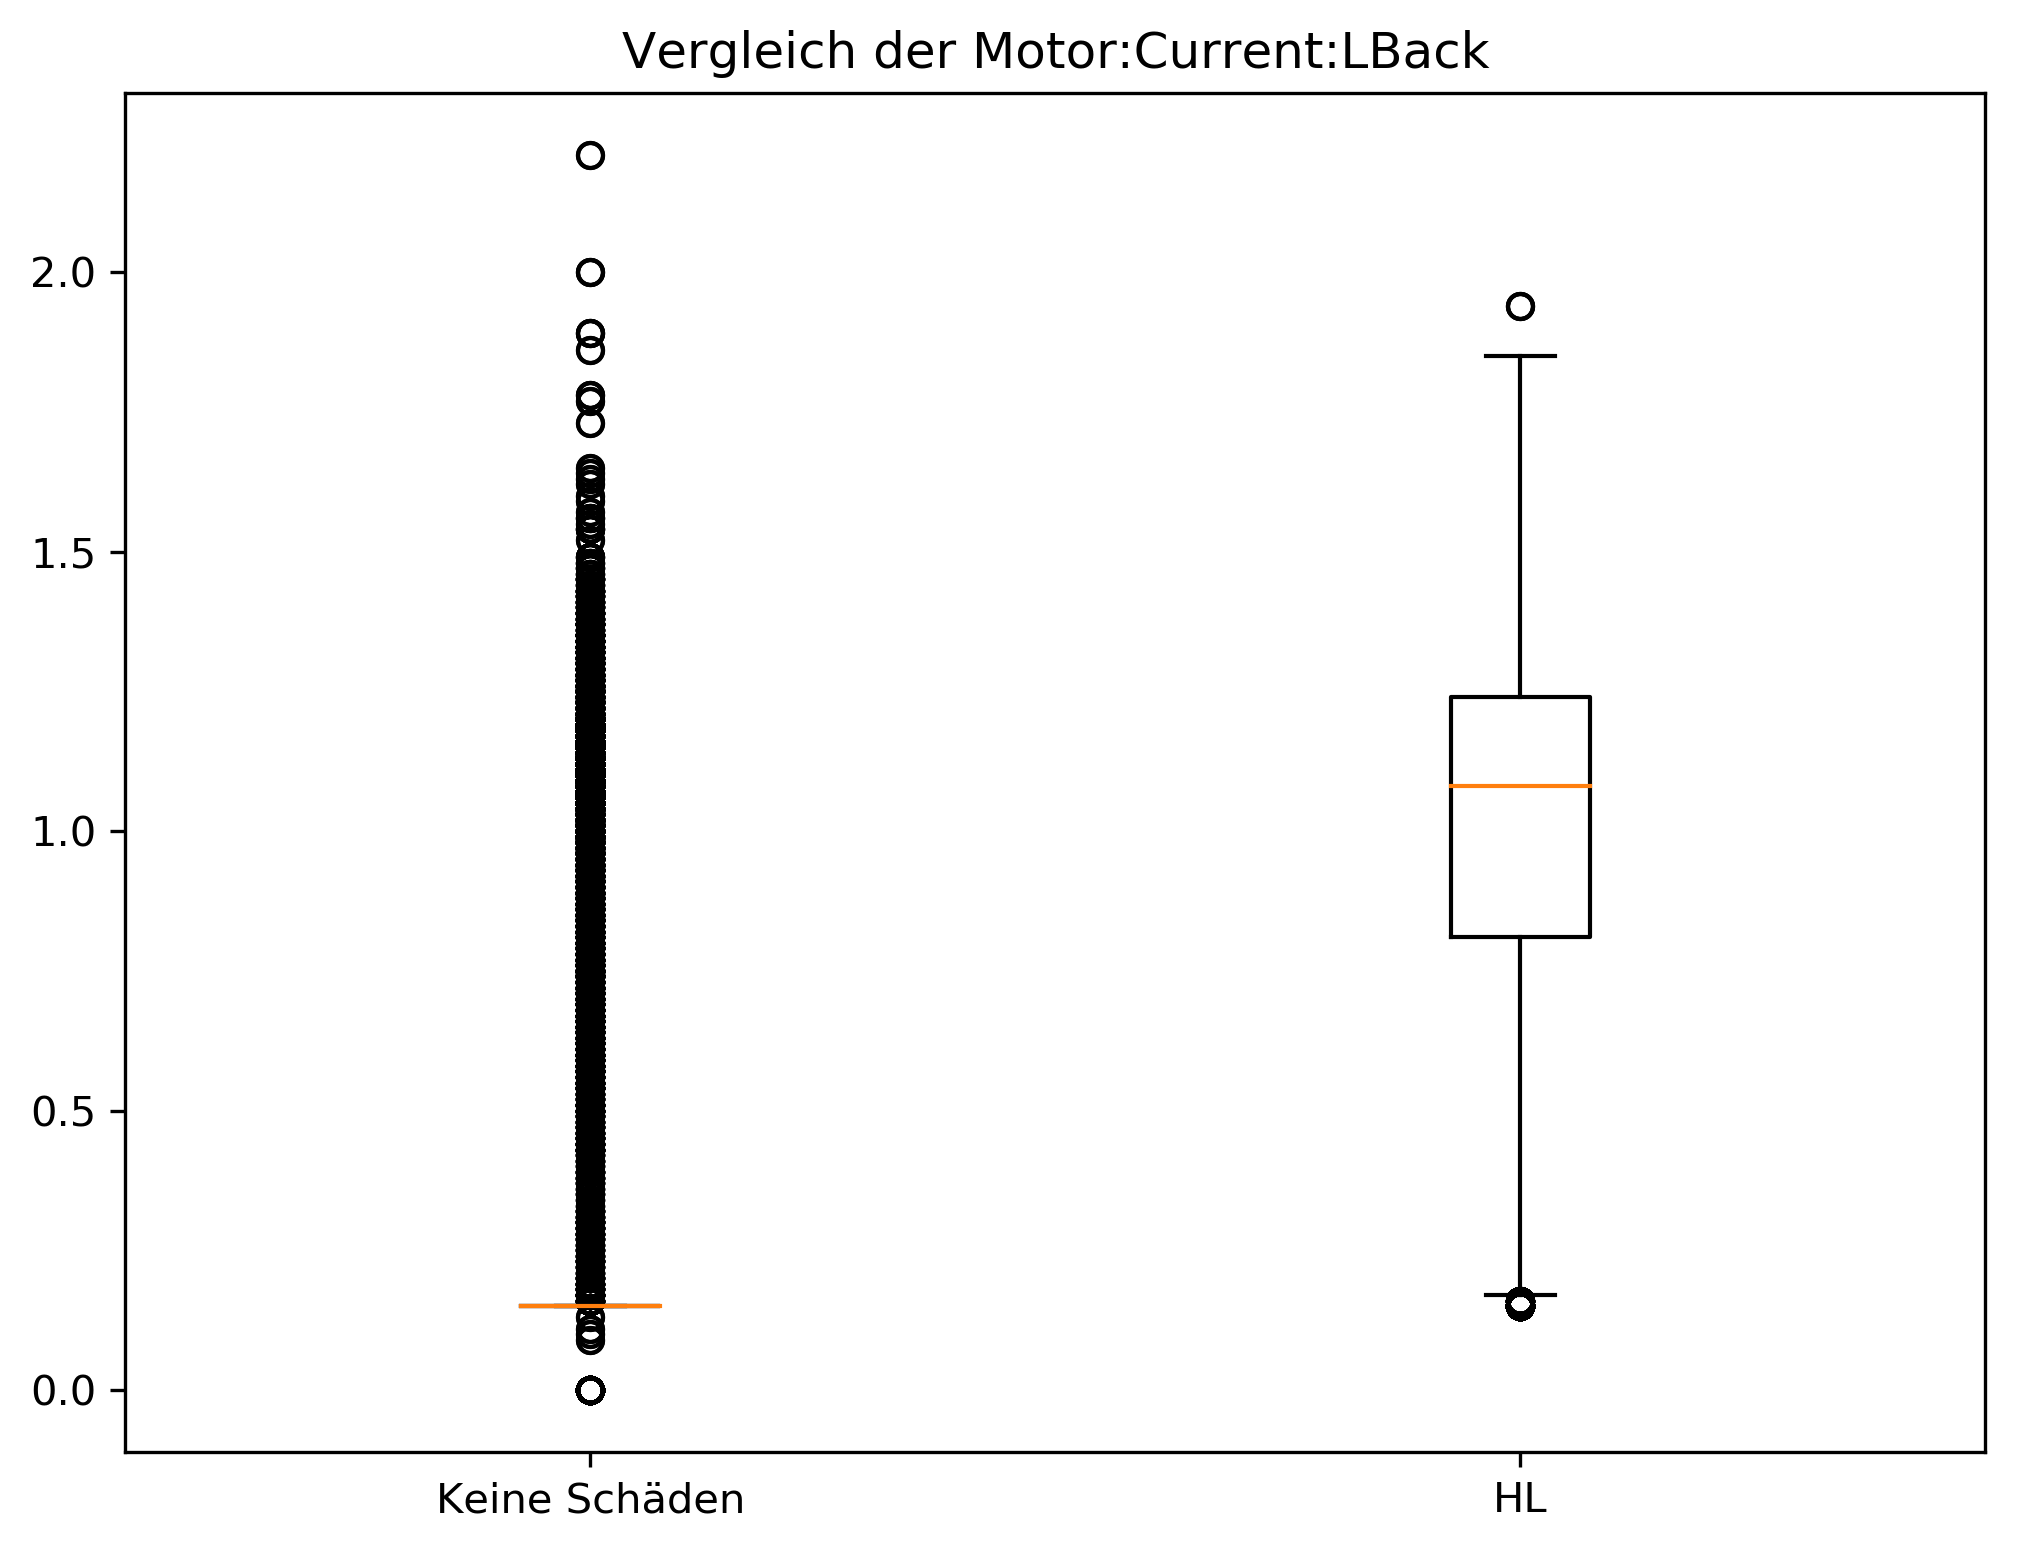

In [37]:
labels = ['Keine Schäden', 'HL']

plt.figure(figsize=(8,6), dpi=300)

plt.title('Vergleich der Motor:Current:LBack')

feature = 'Motor:Current:LBack'

plt.boxplot([df_alles_gut[feature],df_hl[feature]], labels=labels)
plt.show()

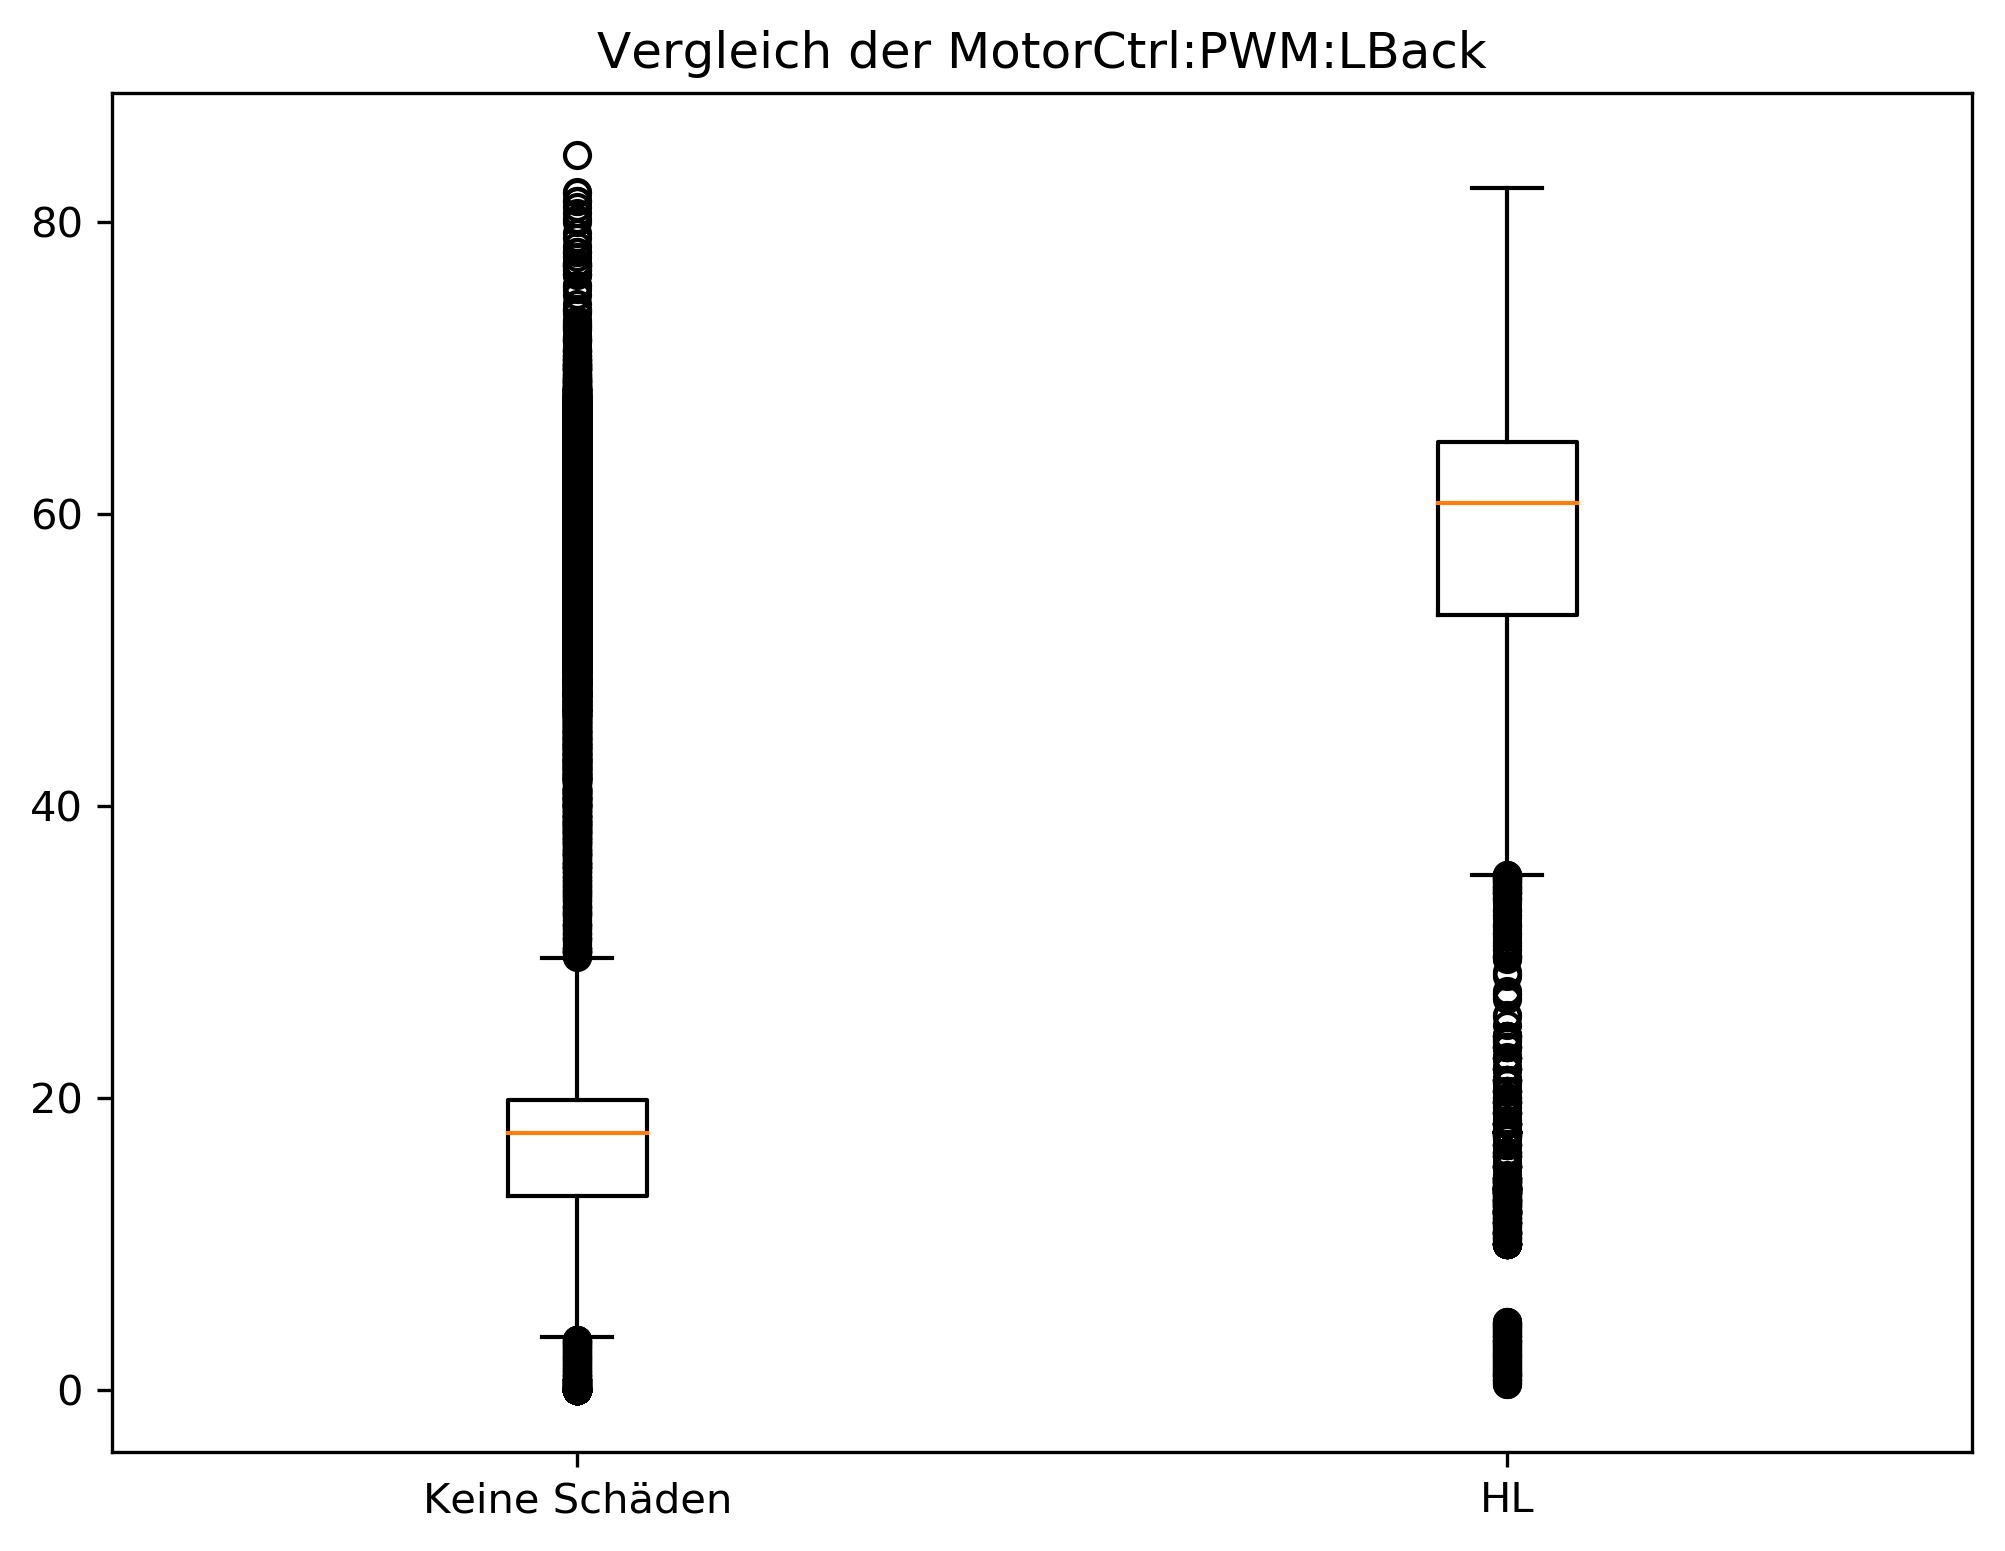

In [38]:
labels = ['Keine Schäden', 'HL']

plt.figure(figsize=(8,6), dpi=300)

plt.title('Vergleich der MotorCtrl:PWM:LBack')

feature = 'MotorCtrl:PWM:LBack'

plt.boxplot([df_alles_gut[feature],df_hl[feature]], labels=labels)
plt.show()

In [39]:
#Der Gedanke war, dass durch die Motordaten, wie die Drehzahl, ein Schaden erkannt werden kann.

## 3 Data Preparation

### 3.1 Select Data

In [40]:
#Die Datensätze wurden in Punkt 2 Data Understanding bereits hochgeladen.

### 3.2 Clean Data

In [41]:
#da die 4 Motor Status Spalten leer sind sowie die letzen 2, kann man die zum Beispiel droppen

df = df.drop(['Motor:Status:RFront','Motor:Status:LFront',
             'Motor:Status:LBack','Motor:Status:RBack','Tick#','flightTime',
             'Schaden:VL','Schaden:VR','Schaden:HR','offsetTime','GPS(0):Time',
            # 'Delta_lat','Delta_long','Flugphase', 
              'ConvertDatV3', '3.6.3'],axis=1)

df

,Schaden:HL,IMU_ATTI(0):Longitude,IMU_ATTI(0):Latitude,IMU_ATTI(0):numSats,IMU_ATTI(0):barometer:Raw,IMU_ATTI(0):barometer:Smooth,IMU_ATTI(0):accel:X,IMU_ATTI(0):accel:Y,IMU_ATTI(0):accel:Z,IMU_ATTI(0):accel:Composite,IMU_ATTI(0):gyro:X,IMU_ATTI(0):gyro:Y,IMU_ATTI(0):gyro:Z,IMU_ATTI(0):gyro:Composite,IMU_ATTI(0):mag:X,...,Motor:Current:LBack,Motor:Current:RBack,Motor:thrustAngle,AirComp:AirSpeedBody:X,AirComp:AirSpeedBody:Y,AirComp:Alti,AirComp:WindSpeed,AirComp:Wind:X,AirComp:Wind:Y,AirComp:MotorSpeed,AirComp:VelLevel,MotorCtrl:PWM:RFront,MotorCtrl:PWM:LFront,MotorCtrl:PWM:LBack,MotorCtrl:PWM:RBack
0,0.0,12.196369,48.556122,11,277.04600,276.82560,-0.819315,-0.159615,-0.529703,0.988605,0.859352,-1.116143,-4.839937,5.040759,826,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
1,0.0,12.196369,48.556122,11,276.94724,276.82584,-0.813760,-0.161909,-0.529964,0.984521,0.829244,-2.484396,-5.595238,6.177908,826,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
2,0.0,12.196369,48.556122,11,276.96338,276.82820,-0.809103,-0.165645,-0.534515,0.983764,0.992859,-2.176294,-5.502081,5.999577,822,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
3,0.0,12.196369,48.556122,11,276.90997,276.82640,-0.808973,-0.172344,-0.538173,0.986797,-0.294570,1.127903,-4.026320,4.191681,818,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
4,0.0,12.196369,48.556122,11,277.00568,276.82968,-0.816588,-0.173097,-0.537622,0.992882,-2.449916,2.623640,-2.172229,4.195731,811,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29569,0.0,12.195242,48.554280,17,245.27061,253.05865,0.022311,-0.001988,-0.980022,0.980278,0.391751,1.914774,-1.661575,2.565280,495,...,0.53,0.45,-14.891876,-1.143595,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,21.19,10.00,40.48,41.38
29570,0.0,12.195242,48.554280,17,245.49745,253.05843,0.024849,-0.019144,-0.983191,0.983691,1.244088,3.575272,1.041029,3.926075,499,...,0.53,0.45,-14.891876,-1.143595,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,15.78,10.00,44.24,39.43
29571,0.0,12.195242,48.554280,17,245.52760,253.05832,0.026022,-0.012653,-0.980031,0.980458,2.836225,2.251293,1.806742,4.046827,491,...,0.40,0.52,-10.996203,-1.143595,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,22.96,10.00,42.14,41.80
29572,0.0,12.195242,48.554280,17,245.57889,253.05830,0.026896,-0.010385,-0.979843,0.980267,1.201486,3.364520,-1.743551,3.975366,487,...,0.40,0.52,-10.996203,-1.143595,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,15.56,18.41,11.85,10.00


In [42]:
#Auf doppelte Zeilen überprüfen
df.duplicated().any()

False

### 3.3 Construct Data

##### Der Datensatz wird hier in x und y aufgeteilt

In [43]:
#x: Merkmale
#y: Ergebnisse (0 oder 1)

df

,Schaden:HL,IMU_ATTI(0):Longitude,IMU_ATTI(0):Latitude,IMU_ATTI(0):numSats,IMU_ATTI(0):barometer:Raw,IMU_ATTI(0):barometer:Smooth,IMU_ATTI(0):accel:X,IMU_ATTI(0):accel:Y,IMU_ATTI(0):accel:Z,IMU_ATTI(0):accel:Composite,IMU_ATTI(0):gyro:X,IMU_ATTI(0):gyro:Y,IMU_ATTI(0):gyro:Z,IMU_ATTI(0):gyro:Composite,IMU_ATTI(0):mag:X,...,Motor:Current:LBack,Motor:Current:RBack,Motor:thrustAngle,AirComp:AirSpeedBody:X,AirComp:AirSpeedBody:Y,AirComp:Alti,AirComp:WindSpeed,AirComp:Wind:X,AirComp:Wind:Y,AirComp:MotorSpeed,AirComp:VelLevel,MotorCtrl:PWM:RFront,MotorCtrl:PWM:LFront,MotorCtrl:PWM:LBack,MotorCtrl:PWM:RBack
0,0.0,12.196369,48.556122,11,277.04600,276.82560,-0.819315,-0.159615,-0.529703,0.988605,0.859352,-1.116143,-4.839937,5.040759,826,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
1,0.0,12.196369,48.556122,11,276.94724,276.82584,-0.813760,-0.161909,-0.529964,0.984521,0.829244,-2.484396,-5.595238,6.177908,826,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
2,0.0,12.196369,48.556122,11,276.96338,276.82820,-0.809103,-0.165645,-0.534515,0.983764,0.992859,-2.176294,-5.502081,5.999577,822,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
3,0.0,12.196369,48.556122,11,276.90997,276.82640,-0.808973,-0.172344,-0.538173,0.986797,-0.294570,1.127903,-4.026320,4.191681,818,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
4,0.0,12.196369,48.556122,11,277.00568,276.82968,-0.816588,-0.173097,-0.537622,0.992882,-2.449916,2.623640,-2.172229,4.195731,811,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29569,0.0,12.195242,48.554280,17,245.27061,253.05865,0.022311,-0.001988,-0.980022,0.980278,0.391751,1.914774,-1.661575,2.565280,495,...,0.53,0.45,-14.891876,-1.143595,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,21.19,10.00,40.48,41.38
29570,0.0,12.195242,48.554280,17,245.49745,253.05843,0.024849,-0.019144,-0.983191,0.983691,1.244088,3.575272,1.041029,3.926075,499,...,0.53,0.45,-14.891876,-1.143595,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,15.78,10.00,44.24,39.43
29571,0.0,12.195242,48.554280,17,245.52760,253.05832,0.026022,-0.012653,-0.980031,0.980458,2.836225,2.251293,1.806742,4.046827,491,...,0.40,0.52,-10.996203,-1.143595,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,22.96,10.00,42.14,41.80
29572,0.0,12.195242,48.554280,17,245.57889,253.05830,0.026896,-0.010385,-0.979843,0.980267,1.201486,3.364520,-1.743551,3.975366,487,...,0.40,0.52,-10.996203,-1.143595,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,15.56,18.41,11.85,10.00


In [44]:
df_x = df.drop(['Schaden:HL'], axis=1)
df_y = df[['Schaden:HL']]

In [45]:
df_x

,IMU_ATTI(0):Longitude,IMU_ATTI(0):Latitude,IMU_ATTI(0):numSats,IMU_ATTI(0):barometer:Raw,IMU_ATTI(0):barometer:Smooth,IMU_ATTI(0):accel:X,IMU_ATTI(0):accel:Y,IMU_ATTI(0):accel:Z,IMU_ATTI(0):accel:Composite,IMU_ATTI(0):gyro:X,IMU_ATTI(0):gyro:Y,IMU_ATTI(0):gyro:Z,IMU_ATTI(0):gyro:Composite,IMU_ATTI(0):mag:X,IMU_ATTI(0):mag:Y,...,Motor:Current:LBack,Motor:Current:RBack,Motor:thrustAngle,AirComp:AirSpeedBody:X,AirComp:AirSpeedBody:Y,AirComp:Alti,AirComp:WindSpeed,AirComp:Wind:X,AirComp:Wind:Y,AirComp:MotorSpeed,AirComp:VelLevel,MotorCtrl:PWM:RFront,MotorCtrl:PWM:LFront,MotorCtrl:PWM:LBack,MotorCtrl:PWM:RBack
0,12.196369,48.556122,11,277.04600,276.82560,-0.819315,-0.159615,-0.529703,0.988605,0.859352,-1.116143,-4.839937,5.040759,826,823,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
1,12.196369,48.556122,11,276.94724,276.82584,-0.813760,-0.161909,-0.529964,0.984521,0.829244,-2.484396,-5.595238,6.177908,826,823,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
2,12.196369,48.556122,11,276.96338,276.82820,-0.809103,-0.165645,-0.534515,0.983764,0.992859,-2.176294,-5.502081,5.999577,822,823,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
3,12.196369,48.556122,11,276.90997,276.82640,-0.808973,-0.172344,-0.538173,0.986797,-0.294570,1.127903,-4.026320,4.191681,818,823,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
4,12.196369,48.556122,11,277.00568,276.82968,-0.816588,-0.173097,-0.537622,0.992882,-2.449916,2.623640,-2.172229,4.195731,811,823,...,0.00,0.00,-45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29569,12.195242,48.554280,17,245.27061,253.05865,0.022311,-0.001988,-0.980022,0.980278,0.391751,1.914774,-1.661575,2.565280,495,520,...,0.53,0.45,-14.891876,-1.143595,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,21.19,10.00,40.48,41.38
29570,12.195242,48.554280,17,245.49745,253.05843,0.024849,-0.019144,-0.983191,0.983691,1.244088,3.575272,1.041029,3.926075,499,536,...,0.53,0.45,-14.891876,-1.143595,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,15.78,10.00,44.24,39.43
29571,12.195242,48.554280,17,245.52760,253.05832,0.026022,-0.012653,-0.980031,0.980458,2.836225,2.251293,1.806742,4.046827,491,548,...,0.40,0.52,-10.996203,-1.143595,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,22.96,10.00,42.14,41.80
29572,12.195242,48.554280,17,245.57889,253.05830,0.026896,-0.010385,-0.979843,0.980267,1.201486,3.364520,-1.743551,3.975366,487,556,...,0.40,0.52,-10.996203,-1.143595,-1.963031,0.607134,2.788358,-2.556259,-1.11377,241.91020,113,15.56,18.41,11.85,10.00


In [46]:
df_y

,Schaden:HL
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
29569,0.0
29570,0.0
29571,0.0
29572,0.0


### 3.4 Format Data

##### To Numpy Array

In [47]:
#Da die train test split Funktion die 4 als DataFrame ausgibt, wandlen wir df_x und y hier schon in ein numpy array um

In [48]:
#Umwandlung von Dataframe zu Array, um darauf mathematische Funktionen anzuwenden

import numpy as np
from sklearn.model_selection import train_test_split
df_x = np.array(df_x)
df_y = np.array(df_y)

## 4 Modelling

### 4.1 Select Modeling Techniques

##### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

### 4.2 Generate Test Design

In [50]:
#Hier teilen wir x und y in Train und Test

In [51]:
#Importieren der Funktion

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

### 4.3 Build Model

In [52]:
#Trainieren des Modells und Bewertung mit score
clf = LogisticRegression(solver='lbfgs',max_iter=2000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8734018331484616

## 5 Evaluation

### 5.1 Evaluation results

##### Die wichtigsten Merkmale

In [53]:
coef_HL = clf.coef_
#da es als matrix[0,99] und nicht als vektor zurückgegeben wurde, änderen wir das hier
coef_HL = coef_HL.reshape(95)
coef_HL

array([ 7.29884023e-06,  2.90523576e-05,  1.14810393e-05,  4.96162792e-05,
        2.20659590e-05,  1.23616583e-07, -6.14868201e-08,  1.31073493e-07,
       -1.57258172e-07,  6.12731425e-06, -3.89226843e-06,  2.33109503e-05,
       -3.03178282e-05, -1.29067233e-03, -1.10194945e-03,  4.26279028e-04,
        1.25058264e-04,  4.15310642e-08, -9.33039083e-08,  7.66684804e-07,
       -3.58264603e-06, -3.79877990e-06, -1.03326091e-07,  1.13448139e-05,
        7.98498621e-06, -1.07773288e-04, -2.79931422e-04, -3.18474750e-03,
       -1.59326163e-04,  4.49176106e-04, -2.23490666e-05,  6.19441449e-06,
        1.49912928e-03, -2.98215721e-05, -2.68079960e-05,  2.98715737e-05,
        2.20939782e-05,  7.29883849e-06,  2.90523583e-05, -3.94541104e-07,
        2.40051969e-04,  6.78065793e-06, -4.49290477e-05, -1.27461853e-04,
        6.48500297e-06,  4.99603630e-06,  1.14810393e-05, -3.29117545e-07,
        1.19239869e-07,  4.08577474e-07,  9.90388648e-05,  5.01146104e-05,
        5.63600642e-04,  

##### Liste mit den Namen der Merkmale

In [54]:
df_x = df.drop(['Schaden:HL'], axis=1)
df_x_names = df_x.columns

##### DataFrame mit den Namen der Merkmale und den zugehörigen Werten (absteigend)

In [55]:
#coef wird hier "Stärke" genannt

In [56]:
df_coef_HL= pd.DataFrame(coef_HL,index=[df_x_names],columns=['Stärke']).sort_values(by='Stärke', ascending=False)
df_coef_HL.head(10)

,Stärke
IMU_ATTI(0):distanceTravelled,0.001499
RC:Rudder,0.000564
IMU_ATTI(0):totalGyro:Y,0.000449
IMU_ATTI(0):mag:Z,0.000426
Motor:Speed:RBack,0.000346
AirComp:MotorSpeed,0.000313
Motor:PPMrecv:LBack,0.000241
GPS(0):heightMSL,0.000240
Motor:PPMsend:LBack,0.000239
Motor:PPMrecv:RBack,0.000178


In [57]:
#Vorhersage Schaden Hinten Links (clf)
#TP, FP, TN, FN https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781838555078/6/ch06lvl1sec34/confusion-matrix


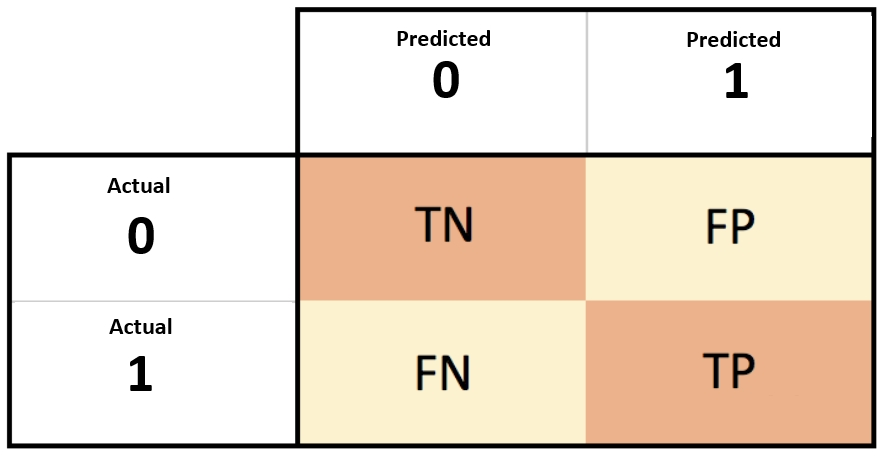

In [58]:
display.Image("./C13314_06_05.jpg")

In [59]:
from sklearn import metrics
y_pred_class = clf.predict(X_test)
print (metrics.confusion_matrix(y_test,y_pred_class))

[[21272  2228]
 [ 2109  8649]]


In [60]:
#Wie in Data Mining Goals beschrieben, wollen wir ,dass das Model etwas früher einen Schaden vorhersagt
#Also soll der Wert FN, also 61, verringert werden

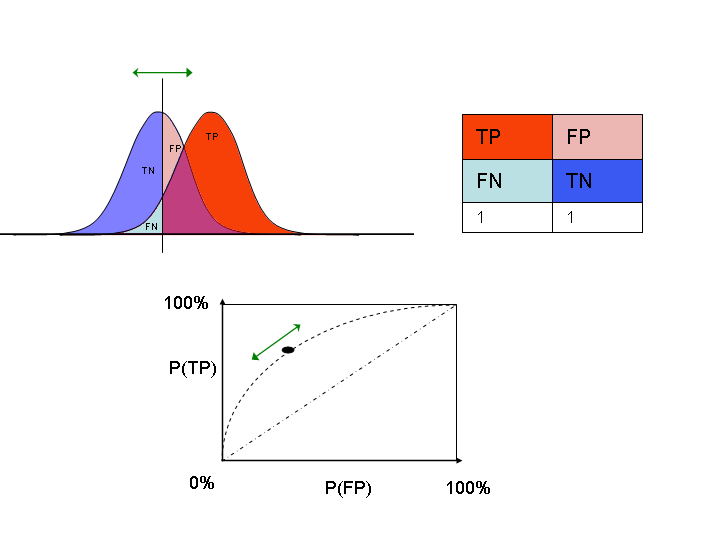

In [61]:
display.Image("./Receiver_Operating_Characteristic.png")

In [62]:
#Der Regler muss also nach links verschoben werden, wodurch FP größer wird und TN kleiner
#FN könnte an dieser Stelle mit Recall verbessert werden und wird berechnet mit (FP/(FP+FN))

D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8734018331484616


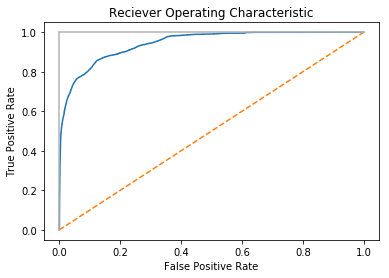

In [63]:
#ROC-Kurve: Grenzwertoptimierungskurve -> ideal: steiler Anstieg 
#Versuch die ROC-Kurve darzustellen, aber der score ist 1.0
#von Chris Albon rauskopiert
from sklearn.metrics import roc_curve, roc_auc_score

#create classifier
logit = LogisticRegression(solver='lbfgs',max_iter=2000)

#train model
logit.fit(X_train, y_train)
print(logit.score(X_test,y_test))

#get predicted probabilities
target_probabilities = logit.predict_proba(X_test)[:,1]

#create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, target_probabilities)

#plot ROC curve
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

##### Lernkurve für Schaden HL

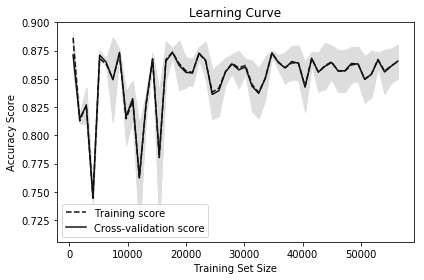

In [64]:
#nach Chris Albon
from sklearn.model_selection import learning_curve
#create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(solver='lbfgs',max_iter=2000), 
                                                        X_train, 
                                                        y_train, 
                                                        cv=10, 
                                                        scoring='accuracy', 
                                                        n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 0.9, 50))

#create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#create means nad standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

#draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

#create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [65]:
#Hier sollte man erkennen, bei welcher Datensatzgröße die besten Ergebnisse erzielt werden, sowie das Overfitting.

## Model Tuning mit GridSearchCV

In [66]:
#Hier erhält man 2 Parameter, mit denen das Modell verbessert werden kann.
from sklearn.model_selection import GridSearchCV

#Create regularization penalty space
penalty = ['l1', 'l2']

#Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

#Create hyperparameter options
lr = LogisticRegression()
hyperparameters = dict(C=C, penalty=penalty)
model = GridSearchCV(lr, hyperparameters, cv=5, verbose=0)
best_model = model.fit(X_train, y_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])


D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programme\Anaconda\anaconda\lib

D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programme\Anaconda\anaconda\lib

D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programme\Anaconda\anaconda\lib

D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programme\Anaconda\anaconda\lib

D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programme\Anaconda\anaconda\lib

D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programme\Anaconda\anaconda\lib

Best Penalty: l1
Best C: 1.0


In [67]:
clf2=LogisticRegression(penalty=best_model.best_estimator_.get_params()['penalty'],
                   C=best_model.best_estimator_.get_params()['C'])

In [68]:
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programme\Anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.996205265923288

In [69]:
# Durch die Parameteranpassung steigt der Score sehr stark an. 
# Allerdings kann bei neuen Daten die Vorhersage sinken, weil man sich zu sehr an einen Datensatz angepasst hat

## 6 Deployment

### 6.1 Export Model

In [70]:
import pickle
 
# Speichern des ersten Models als Pickle
with open ('model_pickle', 'wb') as f:
    pickle.dump(clf,f)

### 6.2 Import Model

In [71]:
# Laden des Models
with open ('model_pickle', 'rb') as f:
    loaded_model = pickle.load(f)

In [72]:
# Vorhersagen mit geladenem Model
loaded_model.score(X_test, y_test)

0.8734018331484616

In [73]:
# Wie wir sehen, kommt der gleiche Score raus.
# Somit ist das Model identisch.